In [1]:
from agents.matchmanager import MatchManager

from itertools import product

from agents import GreedyAgent, AlphaBetaAgent, RandomAgent
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
from agents.ml.simple import SimpleMLAgent
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
def createDf(output):
    agents = ['RandomAgent','SimpleML','GreedyAgent']
    scenarios = ['Junction','JunctionExo']
    all_json=[]
    for i in range(0, 100):
        for s in scenarios:
            for agentRed, agentBlue in product(agents, agents):
                file_name=f'{output}/{agentRed}_{agentBlue}_{s}_{i}.json'
                data=json.load(open(file_name))
                all_json.append(data)  
    df=pd.DataFrame(all_json)
    return df

In [3]:
def addWinnerColumn(df):
    winner_agent=[]
    for i in range(len(df)):
        if ((df["teamRed"][i] == "SimpleML") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "SimpleML") & (df["winner"][i]=="blue")):
            winner_agent.append("SimpleML")
        elif ((df["teamRed"][i] == "RandomAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RandomAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RandomAgent")
        elif ((df["teamRed"][i] == "GreedyAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "GreedyAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("GreedyAgent")
    return winner_agent


In [4]:
def matchesWonForEachAgent(df):
    print("PERCENTUALI GENERALI")
    df['winnerAgent'].value_counts().plot.bar(title='games won for each agent')
    print('Percentuale vincita SimpleML:',len(df[df['winnerAgent']=="SimpleML"])/len(df))
    print('Percentuale vincita RandomAgent:',len(df[df['winnerAgent']=="RandomAgent"])/len(df))
    print('Percentuale vincita GreedyAgent:',len(df[df['winnerAgent']=="GreedyAgent"])/len(df))

In [5]:
def agentVSagent(df,agent1,agent2):
    print("AGENTE VS AGENTE")
    mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))|((df.teamRed == agent2) & (df.teamBlue == agent1))]
    #mask['winnerAgent'].value_counts().plot.bar(title=f'Vincita {agent1} su {agent2}')
    print(f'Percentuale vincita {agent1} su {agent2}:',len(mask[mask['winnerAgent']==agent1])/len(mask))
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        #devi fare groupby su colonna winner, poi fai il count e dividi sul totale
        sns.barplot(y=((dd['winnerAgent'].value_counts())/len(dd))*100,x=dd['winnerAgent'].unique() ,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(f'Percentuale vincita {agent1} su {agent2} su scenario {name}:',len(dd[dd['winnerAgent']==agent1])/len(dd))

    plt.plot() 
    #plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


In [6]:
def agentVSagentColor(df,agent1,agent2,coloragent1):
    print("AGENTE VS AGENTE PER COLORE")
    if (coloragent1=="red"):
        mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))]
        print(f'Percentuale vincita {agent1} Red su {agent2} Blue:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Red su {agent2} Blue su scenario '
    else:
        mask=df.loc[((df.teamRed == agent2) & (df.teamBlue == agent1))]
        print(f'Percentuale vincita {agent1} Blue su {agent2} Red:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Blue su {agent2} Red su scenario '

        
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        sns.barplot(y=((dd['winner'].value_counts())/len(dd))*100,x=dd['winner'].unique() ,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(title,name,len(dd[dd['winner']==coloragent1])/len(dd))

    plt.plot() 
    #metti perncetuale per ogni scenario



In [7]:
dfAll=createDf("outputAll")
dfAll["winnerAgent"]=addWinnerColumn(dfAll)

In [8]:
dfGreedy=createDf("outputGreedy")
dfGreedy["winnerAgent"]=addWinnerColumn(dfGreedy)

In [9]:
dfGreedyRandom=createDf("outputRandomGreedy")
dfGreedyRandom["winnerAgent"]=addWinnerColumn(dfGreedyRandom)

PERCENTUALI GENERALI
Percentuale vincita SimpleML: 0.25555555555555554
Percentuale vincita RandomAgent: 0.25277777777777777
Percentuale vincita GreedyAgent: 0.49166666666666664
AGENTE VS AGENTE
Percentuale vincita SimpleML su RandomAgent: 0.5325
Percentuale vincita SimpleML su RandomAgent su scenario Junction: 0.565
Percentuale vincita SimpleML su RandomAgent su scenario JunctionExo: 0.5
AGENTE VS AGENTE
Percentuale vincita SimpleML su GreedyAgent: 0.1175
Percentuale vincita SimpleML su GreedyAgent su scenario Junction: 0.16
Percentuale vincita SimpleML su GreedyAgent su scenario JunctionExo: 0.075
AGENTE VS AGENTE PER COLORE
Percentuale vincita SimpleML Red su RandomAgent Blue: 0.095
Percentuale vincita SimpleML Red su RandomAgent Blue su scenario  Junction 0.16
Percentuale vincita SimpleML Red su RandomAgent Blue su scenario  JunctionExo 0.03
AGENTE VS AGENTE PER COLORE
Percentuale vincita SimpleML Blue su RandomAgent Red: 0.97
Percentuale vincita SimpleML Blue su RandomAgent Red su 

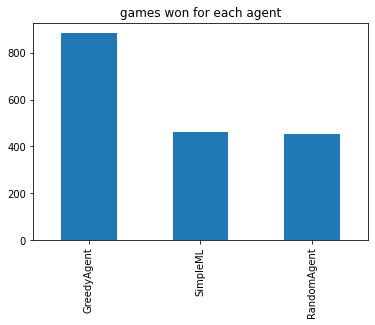

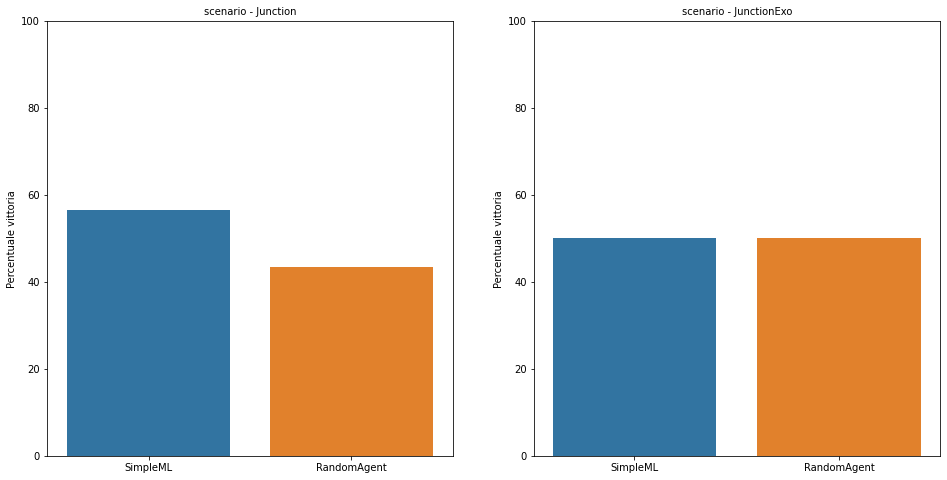

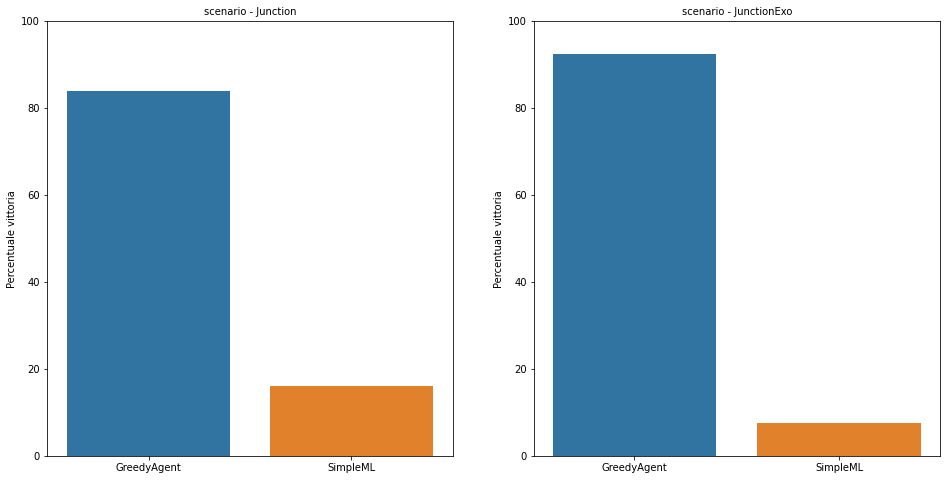

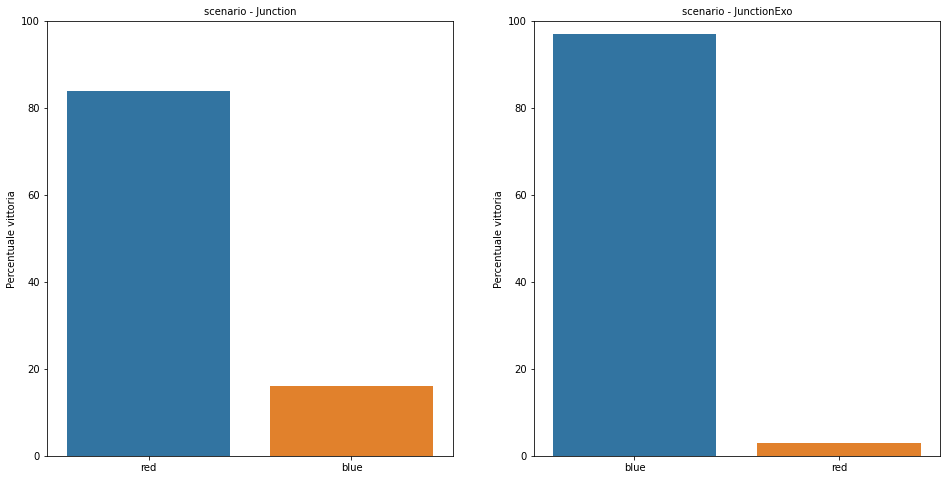

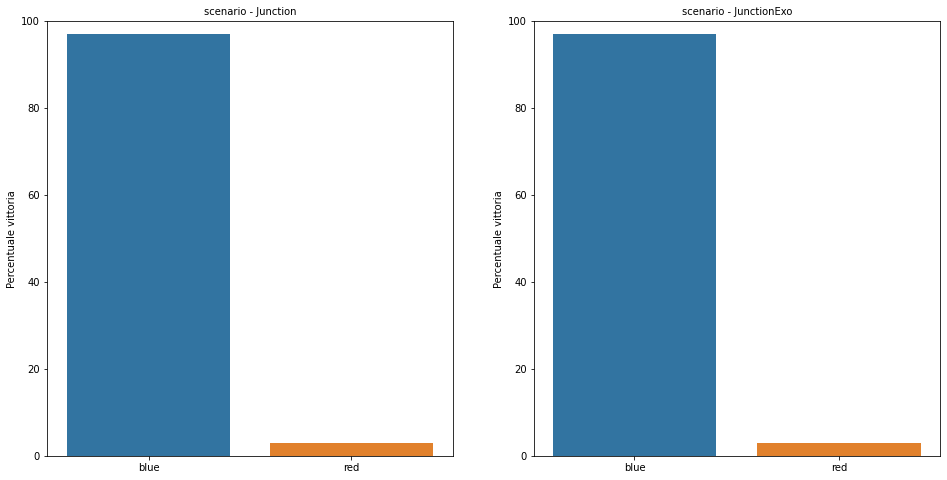

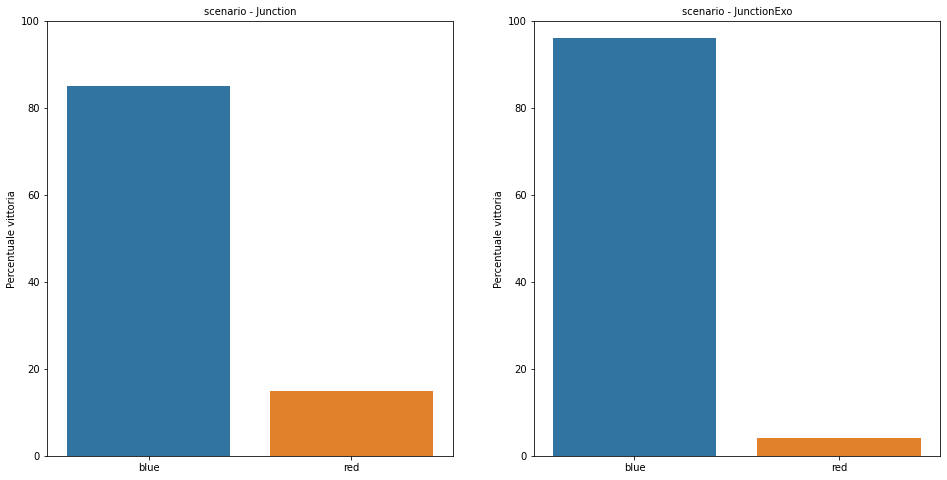

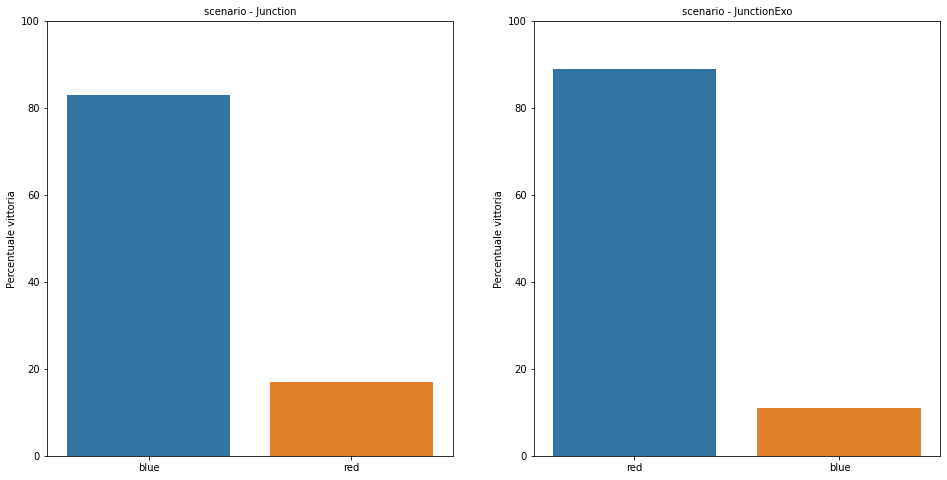

In [10]:
matchesWonForEachAgent(dfAll)
agentVSagent(dfAll,"SimpleML","RandomAgent")
agentVSagent(dfAll,"SimpleML","GreedyAgent")
agentVSagentColor(dfAll,"SimpleML","RandomAgent","red")
agentVSagentColor(dfAll,"SimpleML","RandomAgent","blue")
agentVSagentColor(dfAll,"SimpleML","GreedyAgent","red")
agentVSagentColor(dfAll,"SimpleML","GreedyAgent","blue")




PERCENTUALI GENERALI
Percentuale vincita SimpleML: 0.2594444444444444
Percentuale vincita RandomAgent: 0.26
Percentuale vincita GreedyAgent: 0.48055555555555557
AGENTE VS AGENTE
Percentuale vincita SimpleML su RandomAgent: 0.5
Percentuale vincita SimpleML su RandomAgent su scenario Junction: 0.5
Percentuale vincita SimpleML su RandomAgent su scenario JunctionExo: 0.5
AGENTE VS AGENTE PER COLORE
Percentuale vincita SimpleML Red su RandomAgent Blue: 0.035
Percentuale vincita SimpleML Red su RandomAgent Blue su scenario  Junction 0.05
Percentuale vincita SimpleML Red su RandomAgent Blue su scenario  JunctionExo 0.02
AGENTE VS AGENTE PER COLORE
Percentuale vincita SimpleML Blue su RandomAgent Red: 0.965
Percentuale vincita SimpleML Blue su RandomAgent Red su scenario  Junction 0.95
Percentuale vincita SimpleML Blue su RandomAgent Red su scenario  JunctionExo 0.98
AGENTE VS AGENTE
Percentuale vincita SimpleML su GreedyAgent: 0.1675
Percentuale vincita SimpleML su GreedyAgent su scenario Jun

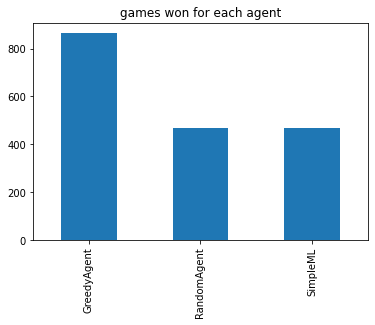

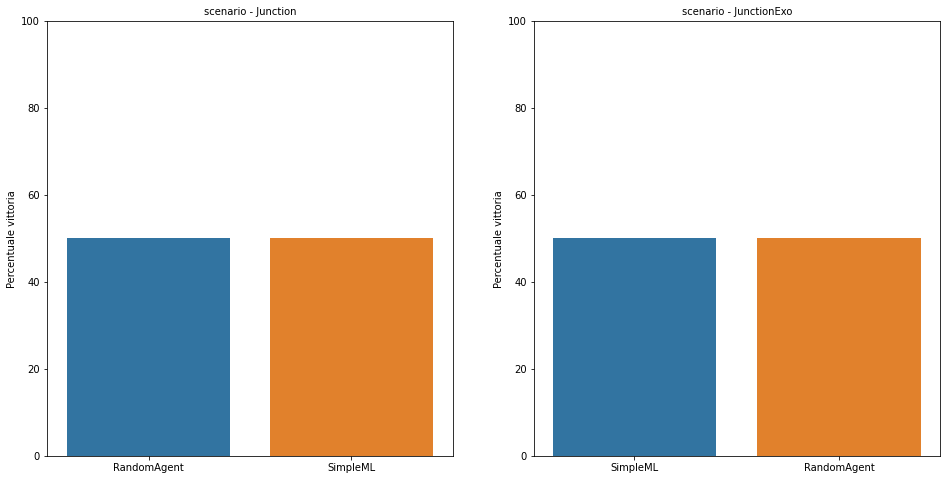

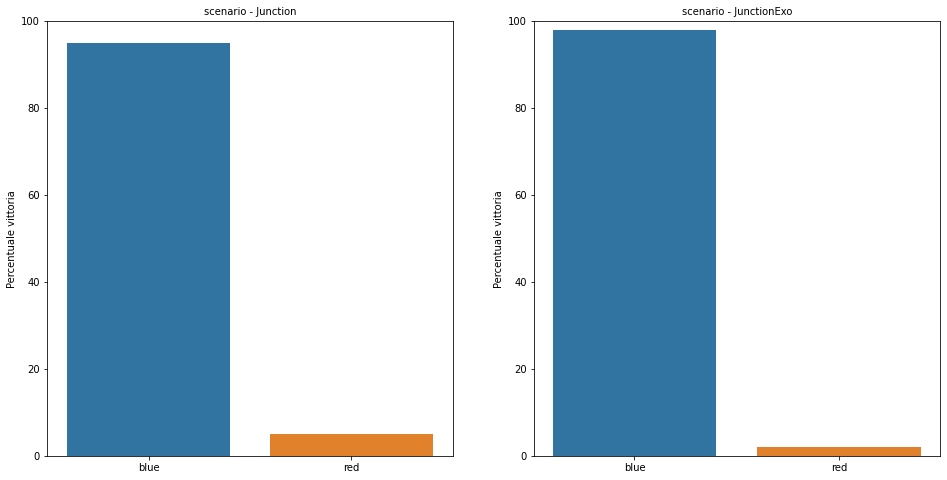

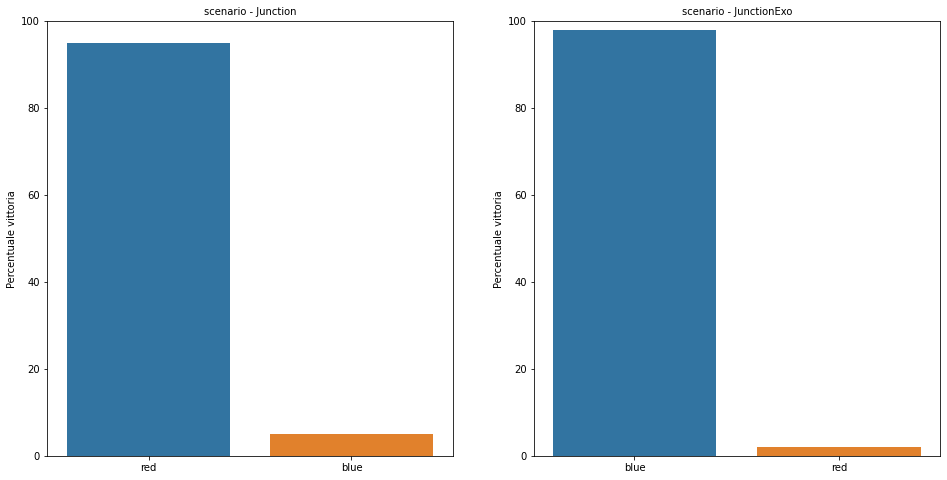

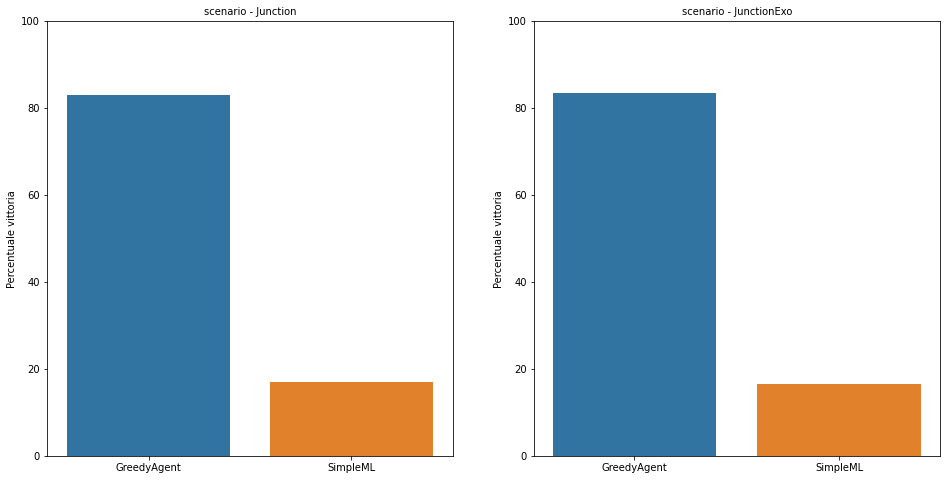

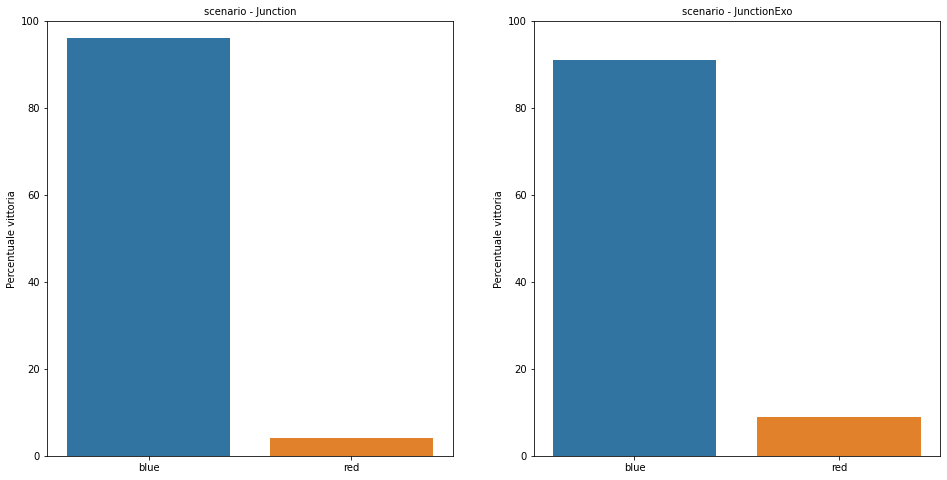

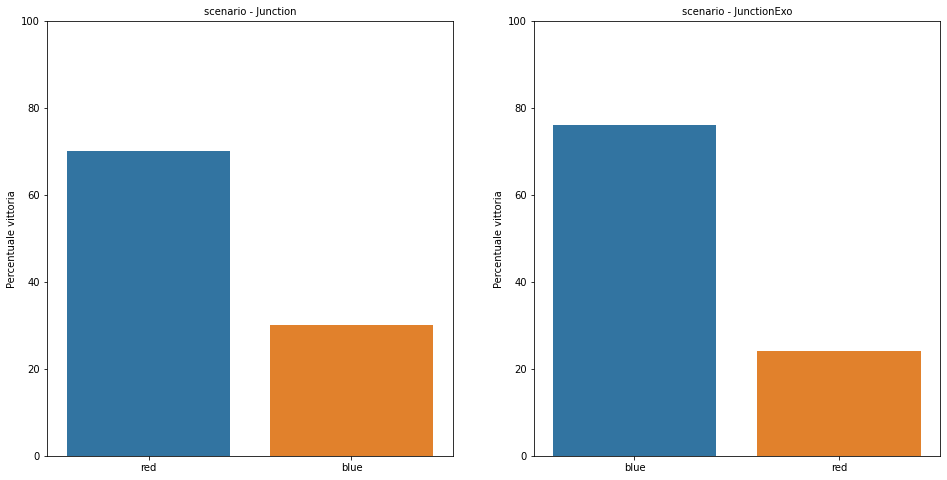

In [11]:
matchesWonForEachAgent(dfGreedy)
agentVSagent(dfGreedy,"SimpleML","RandomAgent")
agentVSagentColor(dfGreedy,"SimpleML","RandomAgent","red")
agentVSagentColor(dfGreedy,"SimpleML","RandomAgent","blue")
agentVSagent(dfGreedy,"SimpleML","GreedyAgent")
agentVSagentColor(dfGreedy,"SimpleML","GreedyAgent","red")
agentVSagentColor(dfGreedy,"SimpleML","GreedyAgent","blue")


PERCENTUALI GENERALI
Percentuale vincita SimpleML: 0.3005555555555556
Percentuale vincita RandomAgent: 0.24444444444444444
Percentuale vincita GreedyAgent: 0.455
AGENTE VS AGENTE
Percentuale vincita SimpleML su RandomAgent: 0.57
Percentuale vincita SimpleML su RandomAgent su scenario Junction: 0.565
Percentuale vincita SimpleML su RandomAgent su scenario JunctionExo: 0.575
AGENTE VS AGENTE
Percentuale vincita SimpleML su GreedyAgent: 0.2825
Percentuale vincita SimpleML su GreedyAgent su scenario Junction: 0.245
Percentuale vincita SimpleML su GreedyAgent su scenario JunctionExo: 0.32
AGENTE VS AGENTE PER COLORE
Percentuale vincita SimpleML Red su RandomAgent Blue: 0.17
Percentuale vincita SimpleML Red su RandomAgent Blue su scenario  Junction 0.17
Percentuale vincita SimpleML Red su RandomAgent Blue su scenario  JunctionExo 0.17
AGENTE VS AGENTE PER COLORE
Percentuale vincita SimpleML Blue su RandomAgent Red: 0.97
Percentuale vincita SimpleML Blue su RandomAgent Red su scenario  Juncti

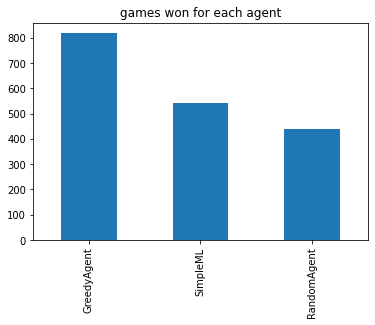

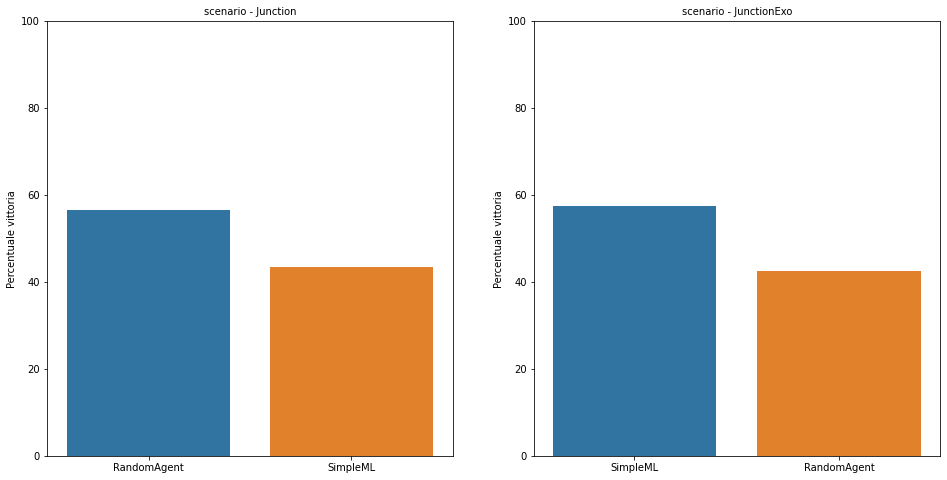

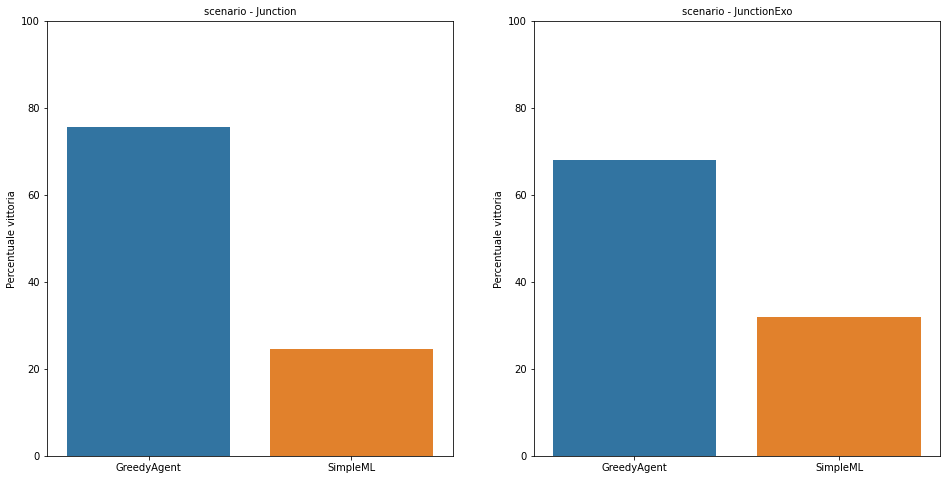

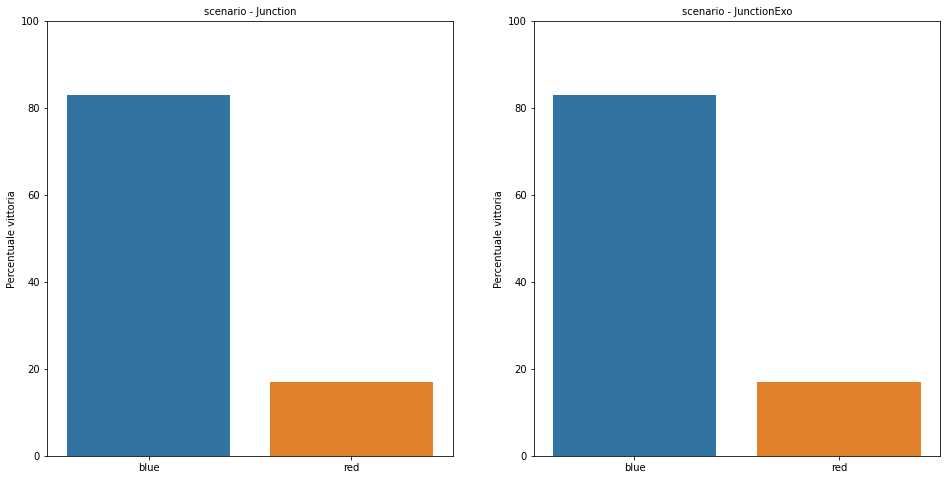

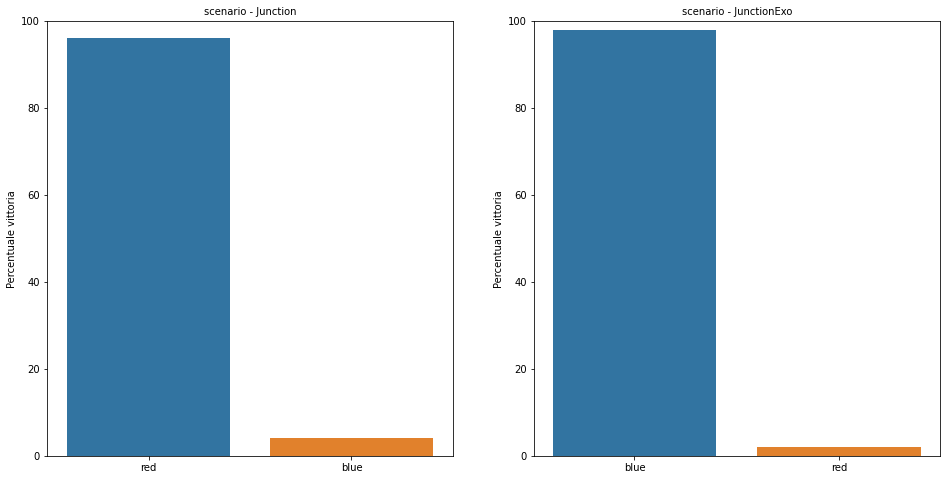

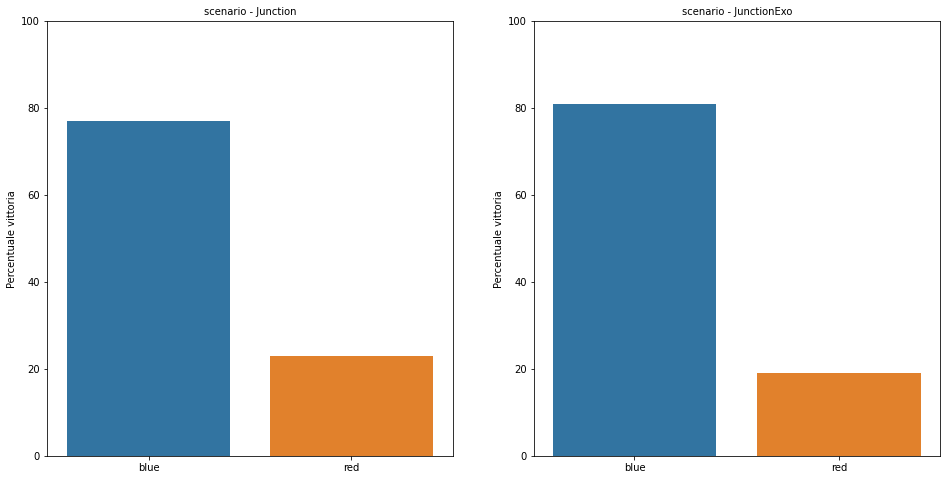

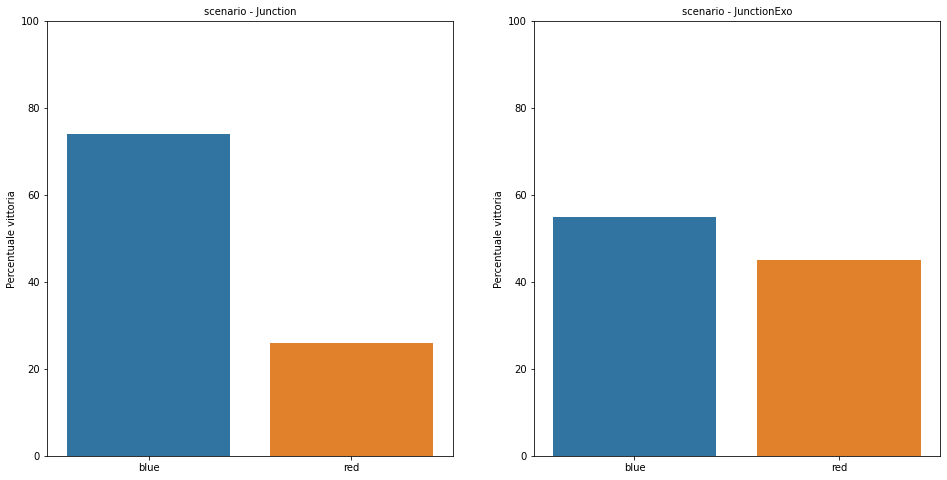

In [12]:
matchesWonForEachAgent(dfGreedyRandom)
agentVSagent(dfGreedyRandom,"SimpleML","RandomAgent")
agentVSagent(dfGreedyRandom,"SimpleML","GreedyAgent")
agentVSagentColor(dfGreedyRandom,"SimpleML","RandomAgent","red")
agentVSagentColor(dfGreedyRandom,"SimpleML","RandomAgent","blue")
agentVSagentColor(dfGreedyRandom,"SimpleML","GreedyAgent","red")
agentVSagentColor(dfGreedyRandom,"SimpleML","GreedyAgent","blue")


In [13]:
#spiegazione del lavoro
